In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Dataset')

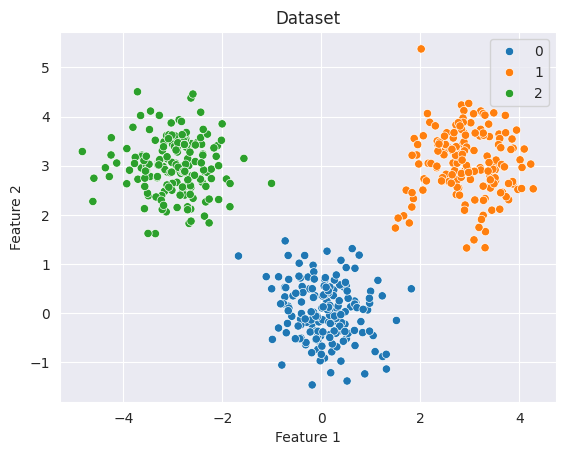

In [2]:
# Generate the data
X, y_true = make_blobs(
    n_samples=500,
    centers=[[0,0], [3,3], [-3,3]],
    cluster_std=0.60,
    random_state=1
)

# Transform to dataframe
blobs_df  = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])
blobs_df
# Plot the data
sns.scatterplot(
    blobs_df,
    x='Feature 1',
    y='Feature 2',
    hue=y_true,
    palette='tab10'
).set_title('Dataset')

In [3]:
# Set number of clusters
NUM_CLUSTERS = 3
COLOR_LIST = ['green', 'orange', 'blue']

# Create range of cluster names
cluster_ids = np.arange(NUM_CLUSTERS)

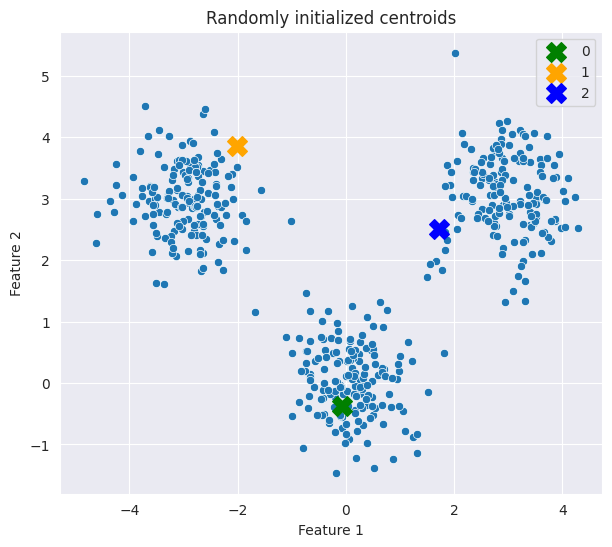

In [4]:
data_point_idxs = np.arange(X.shape[0])
random_idx = np.random.choice(data_point_idxs, size=NUM_CLUSTERS, replace=False)
clust_centers = X[random_idx]


plt.figure(figsize=(7,6))
sns.scatterplot(blobs_df, x='Feature 1', y='Feature 2')
for clust_id, center in enumerate(clust_centers):
    plt.scatter(
        center[0],
        center[1],
        marker='X',
        s=200,
        color=COLOR_LIST[clust_id],
        label=clust_id
    )

plt.title('Randomly initialized centroids')
plt.legend()

In [5]:
# List containing initial cluster centers
center_list = []

# Select first center
random_idx = np.random.choice(data_point_idxs, size=1)[0]
center_list.append(X[random_idx])

# Calculate distances from the first center
distance = np.linalg.norm(X - center_list[0], axis=1)
distance_mtx = np.expand_dims(distance, axis=1)

# Iteration id
next_center = 1

In [6]:
# Generate centers
while len(center_list) < NUM_CLUSTERS:

    # For each point, find distance from closest center
    dist_from_closest = np.min(distance_mtx, axis=1)
    # Transform to probabilities
    selection_probs = dist_from_closest/dist_from_closest.sum()

    # Select new center based on this probabilities
    center_pt_idx = np.random.choice(
        data_point_idxs,
        p=selection_probs
    )

    # Assign new centroid to center list
    center_list.append(X[center_pt_idx])
    next_center+=1

    # Calculate distance from the new center
    distance = np.linalg.norm(X - X[center_pt_idx], axis=1)
    distance_mtx = np.column_stack([distance_mtx, distance])


clust_centers = np.array(center_list)

In [7]:
# Display cluster centers
clust_centers

array([[0.1713524 , 0.5310847 ],
       [2.45052489, 2.75564877],
       [3.30904417, 1.33047932]])

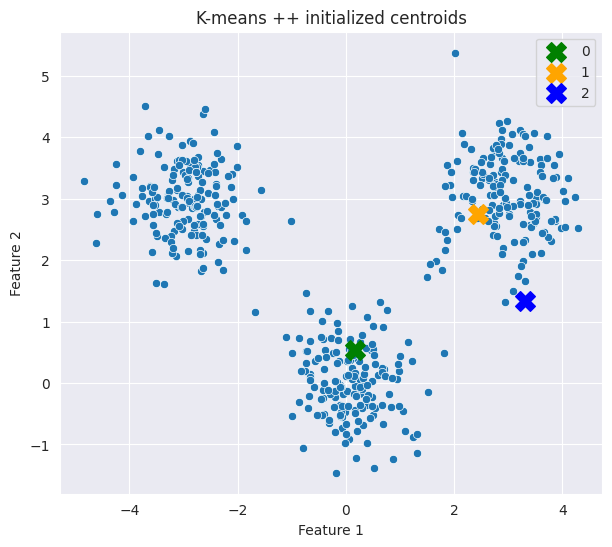

In [8]:
# Plot k means ++ initial cluster centers
plt.figure(figsize=(7,6))
sns.scatterplot(blobs_df, x='Feature 1', y='Feature 2')
color_list = ['green', 'orange', 'blue']
for clust_id, center in enumerate(clust_centers):
    plt.scatter(
        center[0],
        center[1],
        marker='X',
        s=200,
        color=color_list[clust_id],
        label=clust_id
    )

plt.title('K-means ++ initialized centroids')
plt.legend()


In [9]:
# Set MAX_ITER AND TOLERANCE
MAX_ITER = 100
TOLERANCE = 1e-4

# Variable for current iteration
curr_iter = 0

# Iterate until convergence
# or until MAX_ITER is reached
while True:

    # Each element of this list is np array
    # containing distances from all points
    # to the certain center
    distance_list = []

    # List that will be used
    # to update centers
    new_centers = []

    # Iterate through the centers
    for center in clust_centers:

        # Calculate distance from all the points to
        # the current center and add to the list
        distance_list.append(
            np.linalg.norm(X - center, axis=1)
        )

    # Stack elements of distance list into 2D array
    distance_np = np.column_stack(distance_list)
    # Find index of row containing minimum element
    point_cluster = np.argmin(distance_np, axis=1)

    # Update centers
    for cluster_id in cluster_ids:

        new_centers.append(X[point_cluster==cluster_id].mean(axis=0))

    # Transform new centers to np array
    new_centers = np.array(new_centers)

    # Check if loop should be stopped
    # due to MAX_ITER
    if curr_iter >= MAX_ITER:
        break

    # Check if centers have moved
    center_difference = np.linalg.norm(clust_centers - new_centers, axis=1)

    # Check if centers are stable
    if center_difference.max() < TOLERANCE:
        break

    # Make new centers clust_centers
    clust_centers = new_centers

    # Increase iteration counter
    curr_iter += 1



Text(0.5, 1.0, 'Final clustering')

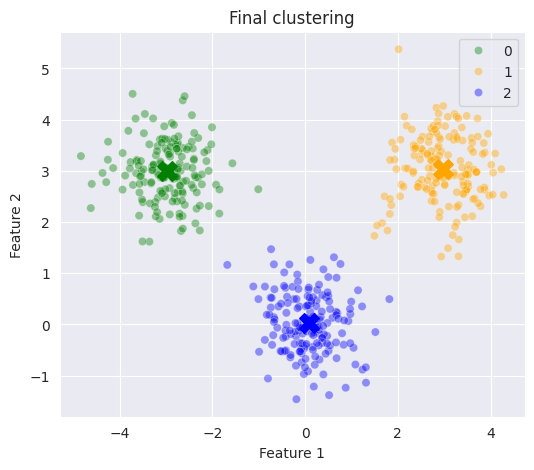

In [10]:
# Plot final result
plt.figure(figsize=(6, 5))

sns.scatterplot(
    blobs_df,
    x='Feature 1',
    y='Feature 2',
    hue=point_cluster,
    palette=color_list,
    alpha=0.4
)

for clust_id, center in enumerate(clust_centers):
    plt.scatter(
        center[0],
        center[1],
        marker='X',
        s=200,
        color=color_list[clust_id]
    )

plt.title('Final clustering')

In [11]:
# Initialize inertia to 0
inertia = 0

# Loop going through data points for
# each cluster
for clust_id in cluster_ids:

    # Calculate inertia portion for current cluster
    clust_points = X[point_cluster == clust_id]
    distance_from_center = np.linalg.norm(clust_points - clust_centers[clust_id], axis=1)

    # Increase inertia
    inertia += np.sum(distance_from_center**2)


In [12]:
inertia

345.0470655631405

In [13]:
# sklearn imports
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# set sns theme and set pandas to display all rows and columns
sns.set_theme()

In [14]:
# Load iris dataset
iris = load_iris()

print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [15]:
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [16]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [19]:
# Create dataset df
iris_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
iris_df.describe().T


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [21]:
# Add label to the dataset
iris_df['label'] = [iris['target_names'][target] for target in iris['target']]

# Remove versicolor class
iris_df = iris_df[iris_df['label'] != 'versicolor']

# Keep only petal length and petal width
iris_df = iris_df.filter(
    items=[
        'petal length (cm)',
        'petal width (cm)',
        'label'
    ]
)

In [22]:
iris_df.head()

,petal length (cm),petal width (cm),label
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


Text(0.5, 1.0, 'Data subset - raw features')

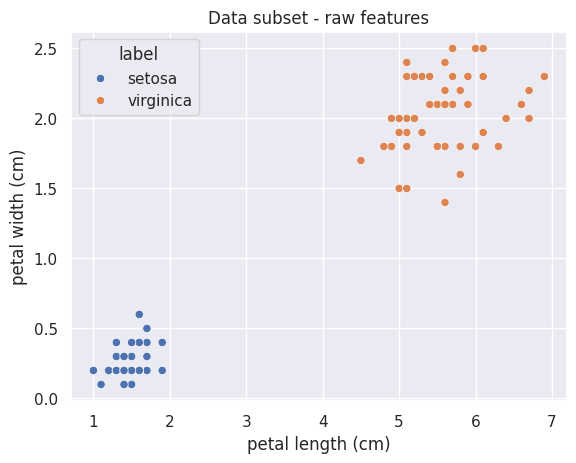

In [23]:
# Scatterplot
sns.scatterplot(
    iris_df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue=iris_df['label']
)

plt.title('Data subset - raw features')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

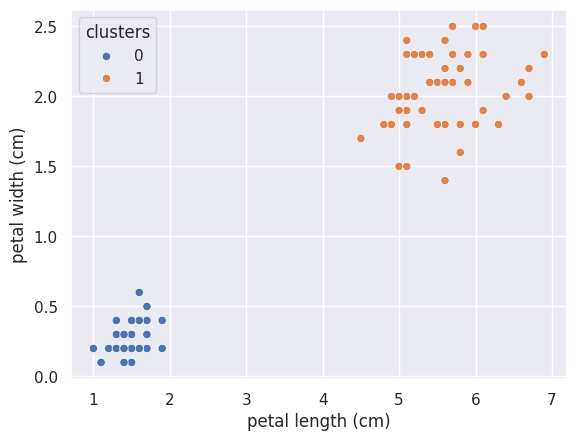

In [24]:
# Prepare K-means clustering input
cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

# Run K-means clustering with k=2
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(cluster_data)

# Extract cluster id for each data point
iris_df['clusters'] = kmeans.predict(cluster_data)

# Plot clustering
sns.scatterplot(
    iris_df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='clusters'
)

In [25]:
# Label values
iris_df['label'].to_numpy()

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virg

In [26]:
# Cluster values
iris_df['clusters'].to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [27]:
# Adjusted rand index - value of 1 means that original labels and clustering results match perfectly.
adjusted_rand_score(iris_df['label'].to_numpy(), iris_df['clusters'].to_numpy())

1.0

Text(0.5, 1.0, 'Scaled data')

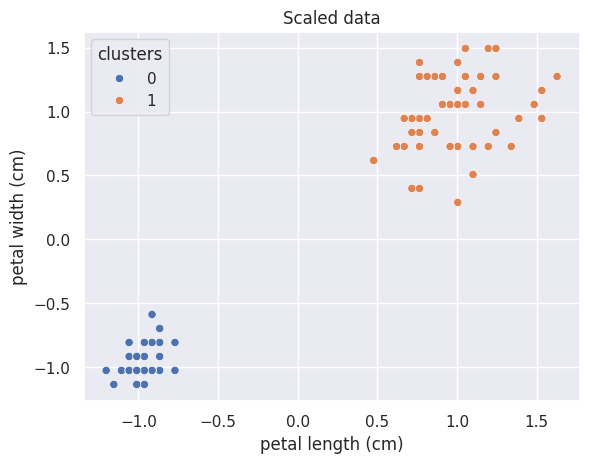

In [28]:
# Prepare the input data
cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

# Scale the data
standard_scaler = StandardScaler()
standard_scaler.fit(cluster_data)
cluster_data = standard_scaler.transform(cluster_data)
cluster_data = pd.DataFrame(
    cluster_data,
    columns = ['petal length (cm)', 'petal width (cm)']
)

# Run K-means clustering with k=2
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(cluster_data)


# Extract cluster assignment for each data point
cluster_data['clusters'] = kmeans.predict(cluster_data)

# Plot clustering
sns.scatterplot(
    cluster_data,
    x='petal length (cm)',
    y='petal width (cm)',
    hue=cluster_data['clusters']
)

plt.title('Scaled data')

In [29]:
# Adjusted rand index - value of 1 means that original labels and clustering results match perfectly.
adjusted_rand_score(
    iris_df['label'].to_numpy(),
    iris_df['clusters'].to_numpy()
)

1.0

In [31]:
import sys
!{sys.executable} -m pip install kneed

In [32]:
# sklearn imports
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# import knee detection algorithm
from kneed import KneeLocator

# set sns theme and set pandas to display all rows and columns
sns.set_theme()

In [33]:
# Load iris dataset
iris = load_iris()

iris_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)


# Add label to the dataset
iris_df['label'] = iris['target_names'][iris['target']]

# Remove versicolor class
iris_df = iris_df[iris_df['label'] != 'versicolor']

# Keep only petal length and petal width
iris_df = iris_df.filter(
    items=[
        'petal length (cm)',
        'petal width (cm)',
        'label'
    ]
)

Text(0.5, 1.0, 'Raw data')

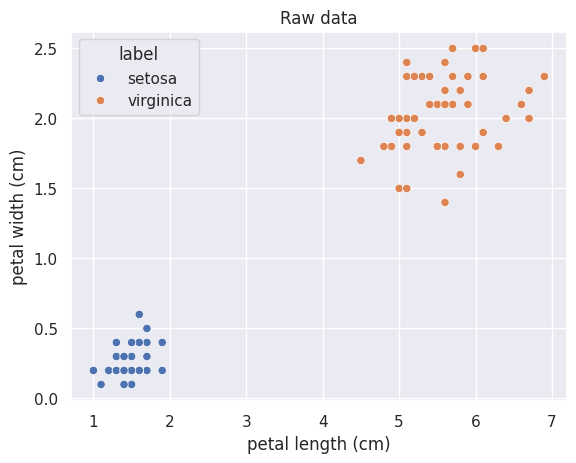

In [34]:
sns.scatterplot(
    iris_df,
    x='petal length (cm)',
    y='petal width (cm)',
    hue='label'
)

plt.title('Raw data')

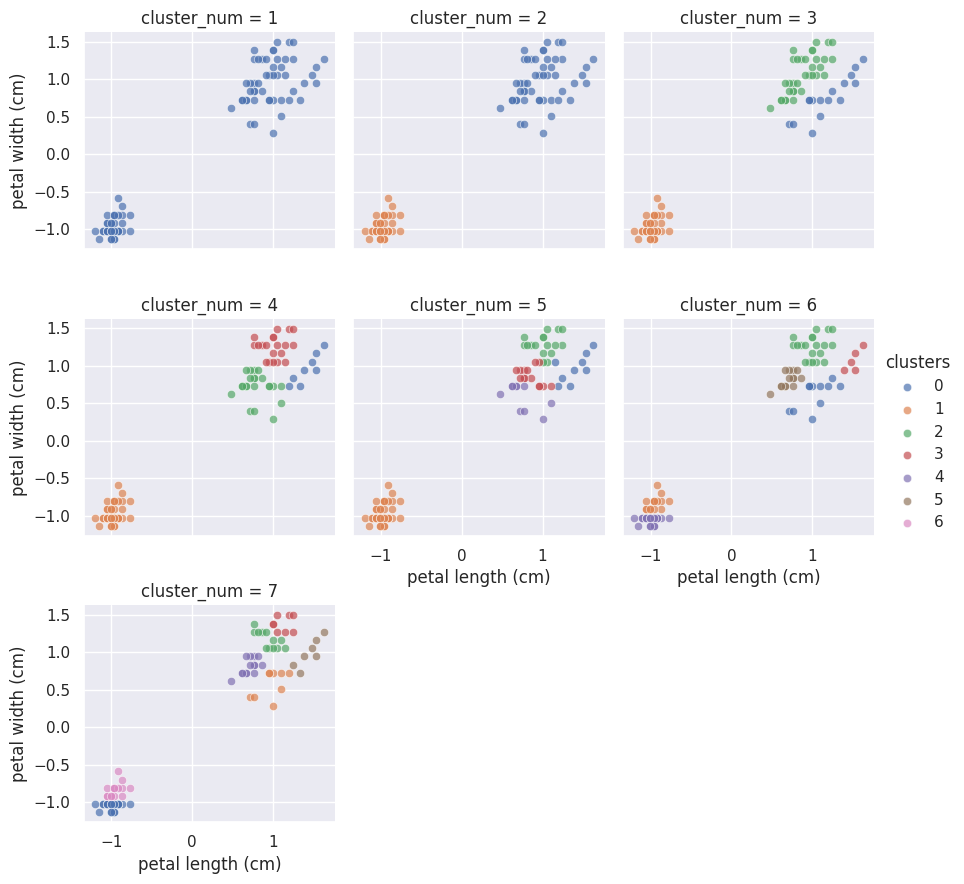

In [35]:
# Set up multiple values of k
num_clusters = [1,2,3,4,5,6,7]

# List used to store inertia
inertia_list = []
# List used to store clusters
clustering_result_list = []

# Set up standard scaler
cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

# Standardize the data
standard_scaler = StandardScaler()
standard_scaler.fit(cluster_data)
cluster_data = standard_scaler.transform(cluster_data)
cluster_data = pd.DataFrame(
    cluster_data,
    columns = ['petal length (cm)', 'petal width (cm)']
)

# Perform clustering for multiple resolutons
for num_clust in num_clusters:

    # Perform clustering for current number of clusters
    kmeans = KMeans(n_clusters=num_clust, n_init='auto')
    kmeans.fit(cluster_data)

    # Calculate inertia
    inertia_list.append(kmeans.inertia_)

    # Add clustering result to the list
    current_clustering = cluster_data.copy()
    current_clustering['clusters'] = kmeans.labels_
    current_clustering['cluster_num'] = num_clust
    clustering_result_list.append(current_clustering)

# Merge results for all values of num_clust
merged_clustering_result = pd.concat(
    clustering_result_list,
    axis=0,
    ignore_index=True
)

# Plot all clusterings
g = sns.FacetGrid(
    merged_clustering_result,
    col="cluster_num",
    col_wrap=3,
    hue="clusters"
)
g.map(
    sns.scatterplot,
    'petal length (cm)',
    'petal width (cm)',
    alpha=.7
)
g.add_legend()

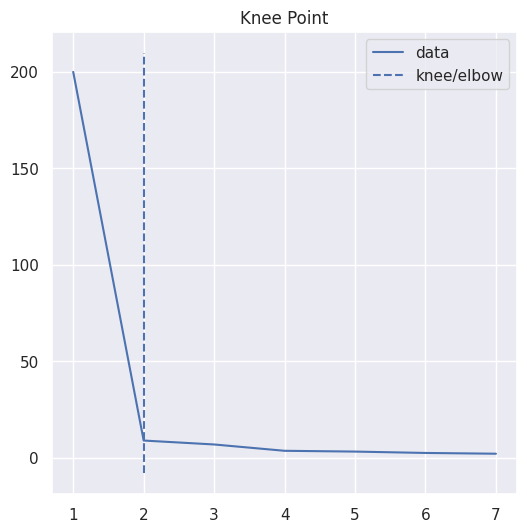

In [36]:
kneedle = KneeLocator(
    num_clusters,
    inertia_list,
    curve="convex",
    direction="decreasing"
)
kneedle.plot_knee()

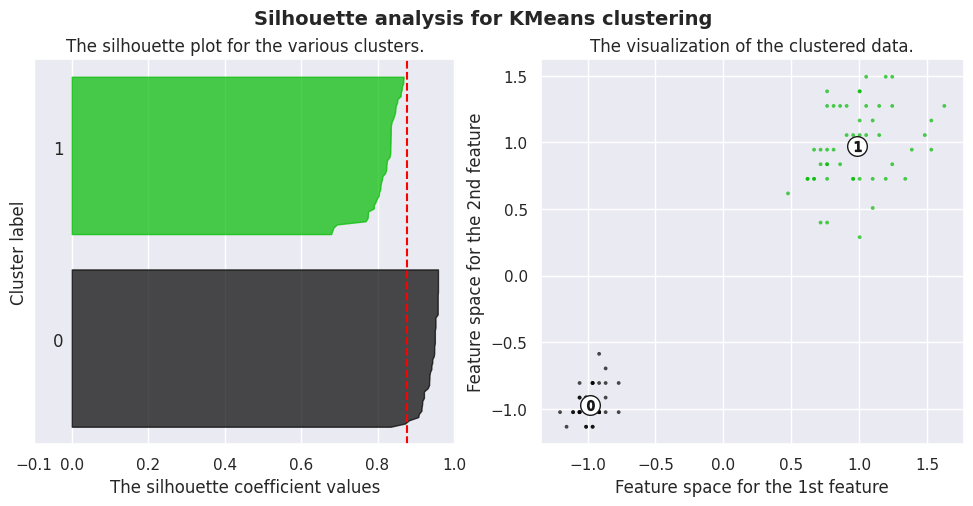

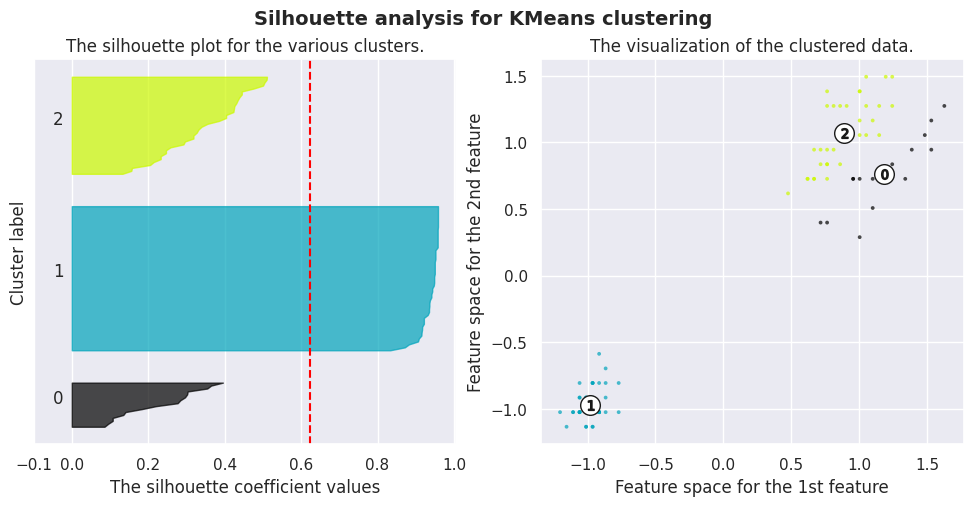

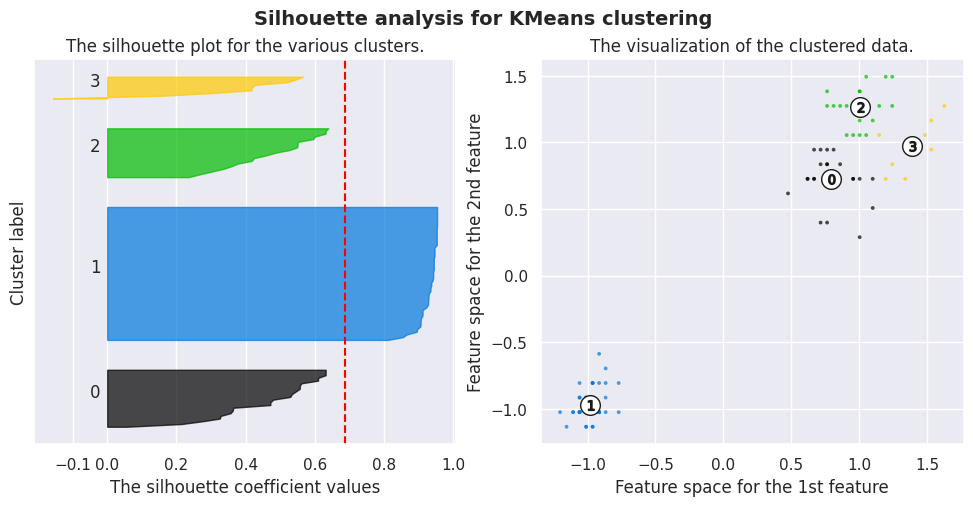

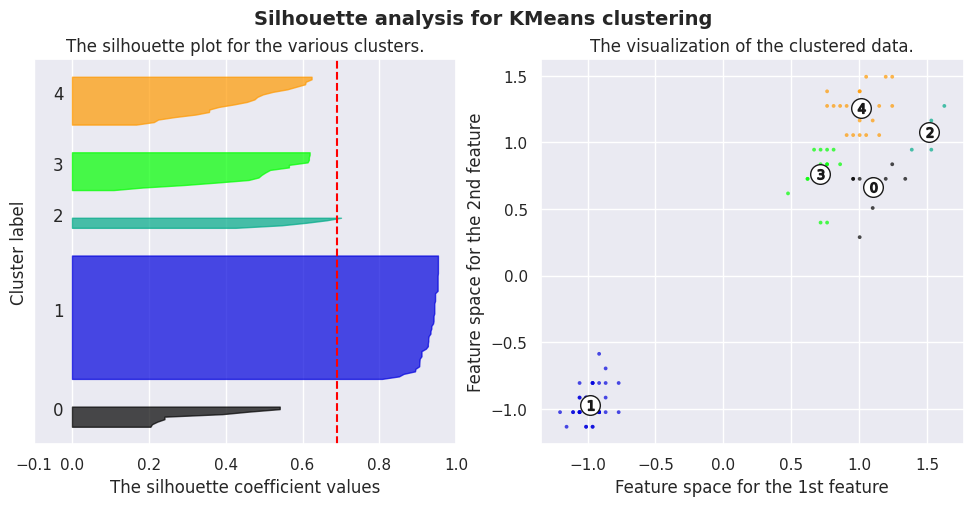

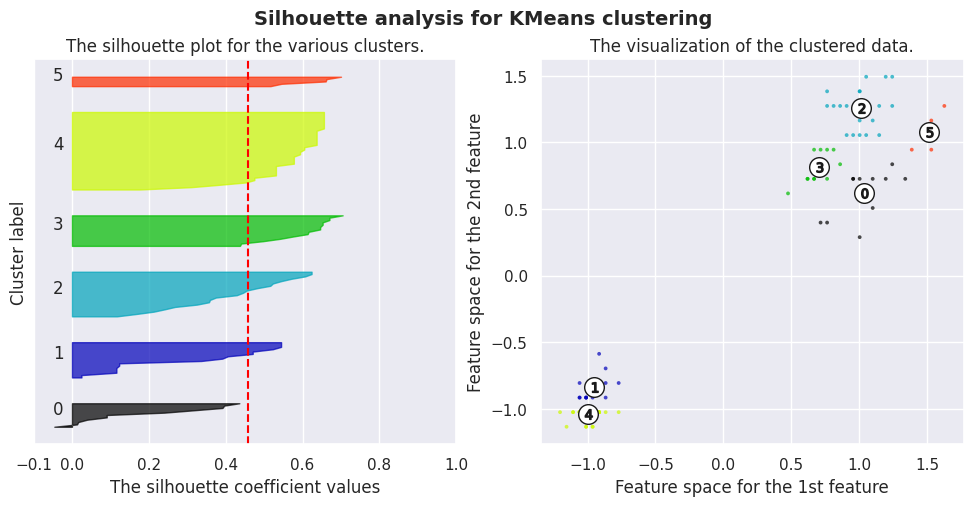

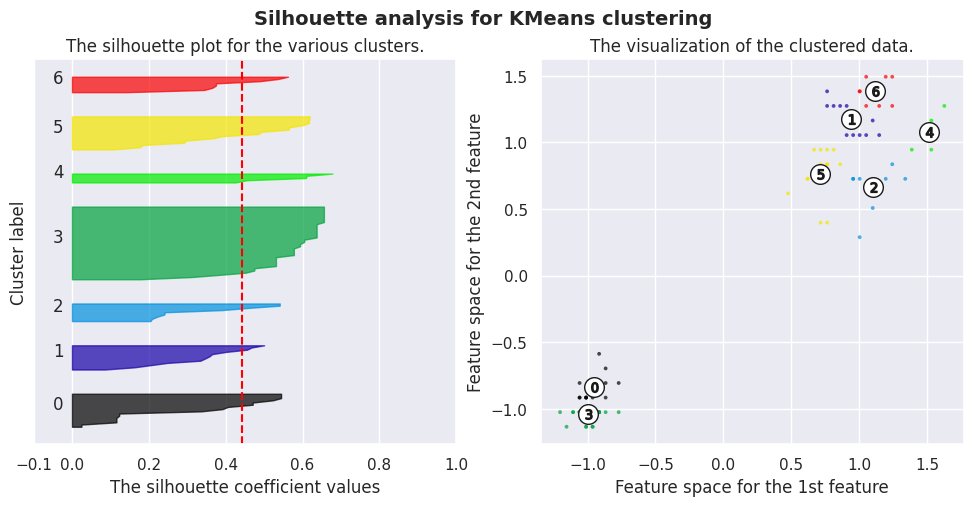

In [37]:
# Set up multiple values of k
num_clusters = [2,3,4,5,6,7]

# Lists for storing results
silouethe_score_list = []

# Set up standard scaler
cluster_data = iris_df[['petal length (cm)', 'petal width (cm)']]

standard_scaler = StandardScaler()
standard_scaler.fit(cluster_data)
cluster_data = standard_scaler.transform(cluster_data)
cluster_data = pd.DataFrame(
    cluster_data,
    columns = ['petal length (cm)', 'petal width (cm)']
)

# Perform clustering for multiple resolutons

# Lower y coordinate for the first silhouette plot
y_lower = 10

for num_clust in num_clusters:

    # Perform clustering for current number of clusters
    kmeans = KMeans(n_clusters=num_clust, n_init='auto')
    kmeans.fit(cluster_data)

    # Calculate average silhouette score
    silhouette_scr = silhouette_score(cluster_data, kmeans.labels_)
    silouethe_score_list.append(silhouette_scr)
    # Calculate silhouette score for each data point
    sample_silhouette_values = silhouette_samples(cluster_data, kmeans.labels_)

    # Plot clustering and silouethes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    # Plot siluethe scores for points belonging to each cluster
    for clust_i in range(num_clust):

        # Get points bellogning to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[
            kmeans.labels_ == clust_i
        ]

        # Sort points by silhouette value
        ith_cluster_silhouette_values.sort()

        # Get size of current cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        # Get upper value of y cooridnate for current cluster
        y_upper = y_lower + size_cluster_i

        # Fill values between y_lower and y_upper with silhouette score values
        # for data points
        color = cm.nipy_spectral(float(clust_i) / num_clust)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        # Label the silhouette plots with their cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(clust_i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    # Set title and labels silhouette subplot
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_scr, color="red", linestyle="--")

    # Clear the yaxis labels / ticks
    ax1.set_yticks([])
    # Set x-ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Map cluster labels to cluster colors, nipy_spectral provides
    # colors evenly distributed across the entire range of values.
    colors = cm.nipy_spectral(kmeans.labels_.astype(float) / num_clust)

    # 2nd Plot showing the actual clustering scatteplot
    ax2.scatter(
        cluster_data.values[:, 0],
        cluster_data.values[:, 1],
        marker=".", s=30, lw=0,
        alpha=0.7, c=colors,
        edgecolor="k"
    )

    # Get cluster centers
    centers = kmeans.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, s=50, edgecolor="k")

    # Set title and labels for scatterplot
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    # Add main title
    plt.suptitle(
        "Silhouette analysis for KMeans clustering",
        fontsize=14,
        fontweight="bold",
    )

# Show the plot
plt.show()

Text(0, 0.5, 'Silhouette score value')

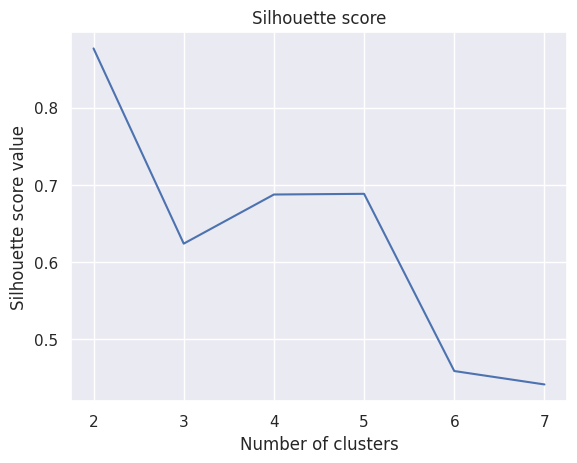

In [38]:
# Overall siluethe scores
plt.plot(num_clusters, silouethe_score_list)
plt.title('Silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score value')


In [41]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(
    n_samples=500, centers=5, cluster_std=0.60, random_state=1
)


In [42]:
artificial_df = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

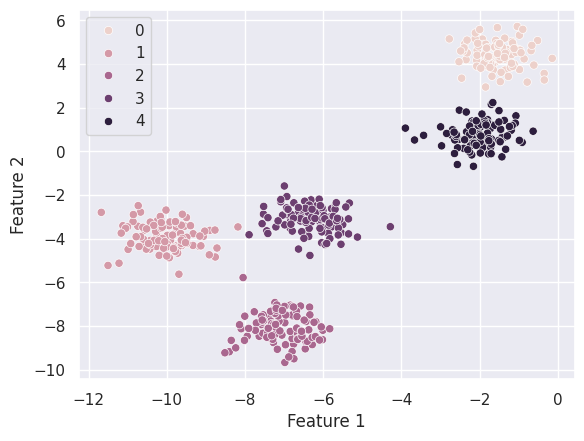

In [43]:
sns.scatterplot(artificial_df, x='Feature 1', y='Feature 2', hue=y_true)

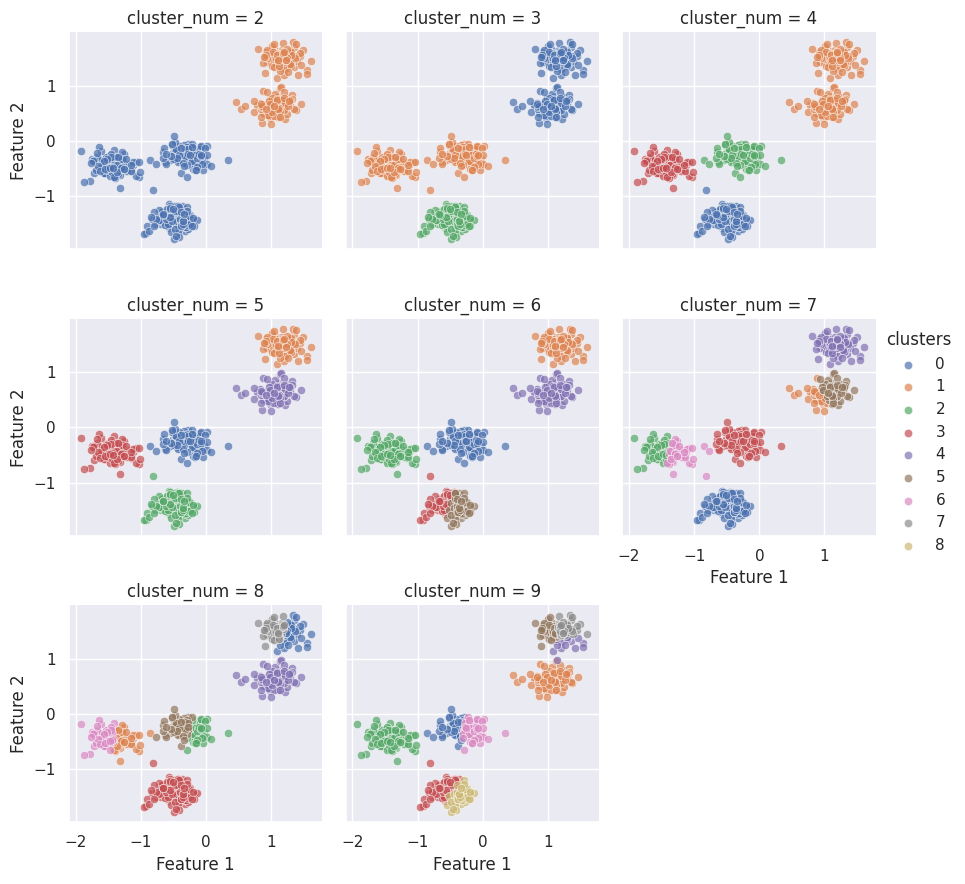

In [44]:
# Different numbers of k to try out
num_clusters = [2,3,4,5,6,7,8,9]
# Storage for inertia value
inertia_list = []
# Storage for silhouette scores
silhouette_score_list = []
# List used to store clustering results
clustering_result_list = []

# Use StandardScaler to standardize data
standard_scaler = StandardScaler()
artificial_df = standard_scaler.fit_transform(artificial_df)
artificial_df = pd.DataFrame(
    data=artificial_df,
    columns=['Feature 1', 'Feature 2']
)

# Perform clustering for different number of clusters
for num_clust in num_clusters:

    # Perform k means clustering
    kmeans = KMeans(n_clusters=num_clust, n_init='auto')
    kmeans.fit(artificial_df)

    # Calculate and store inertia & silhouette score
    inertia_list.append(kmeans.inertia_)
    silhouette_scr = silhouette_score(artificial_df, kmeans.labels_)
    silhouette_score_list.append(silhouette_scr)

    # Add clustering result to list
    current_clustering = artificial_df.copy()
    current_clustering['clusters'] = kmeans.labels_
    current_clustering['cluster_num'] = num_clust
    clustering_result_list.append(current_clustering)

# Merge results for all values of num_clust
merged_clustering_result = pd.concat(
    clustering_result_list,
    axis=0,
    ignore_index=True
)

# Plot all clusterings
g = sns.FacetGrid(
    merged_clustering_result,
    col="cluster_num",
    col_wrap=3,
    hue="clusters"
)
g.map(
    sns.scatterplot,
    'Feature 1',
    'Feature 2',
    alpha=.7
)
g.add_legend()

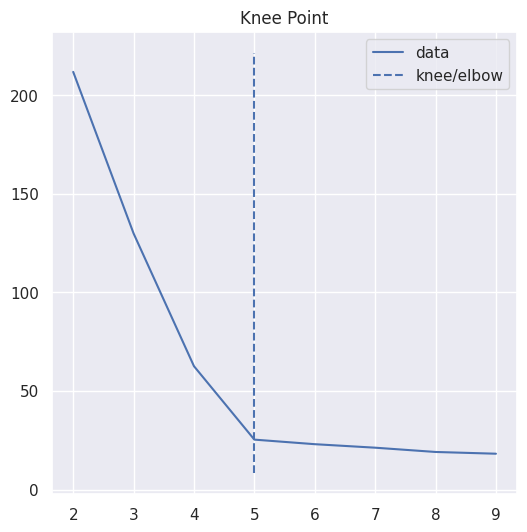

In [45]:
# Plot inertia
kneedle = KneeLocator(
    num_clusters,
    inertia_list,
    curve="convex",
    direction="decreasing"
)
kneedle.plot_knee()

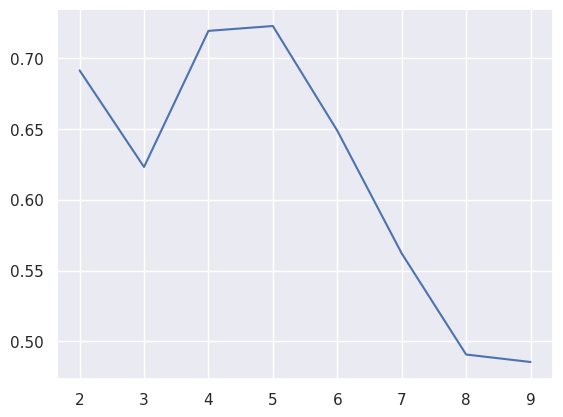

In [46]:
plt.plot(num_clusters, silhouette_score_list)

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

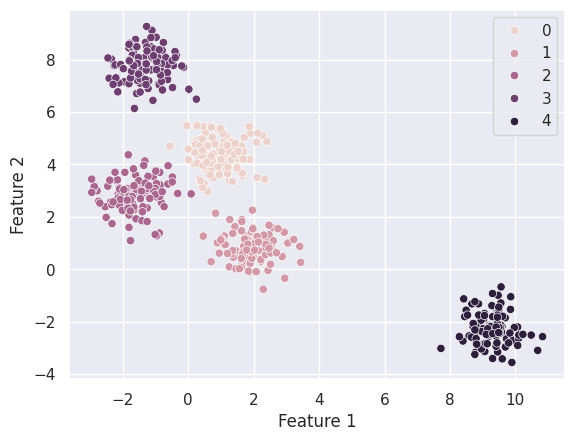

In [52]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(
    n_samples=500, centers=5, cluster_std=0.6, random_state=0
)

artificial_df = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])

sns.scatterplot(artificial_df, x='Feature 1', y='Feature 2', hue=y_true)

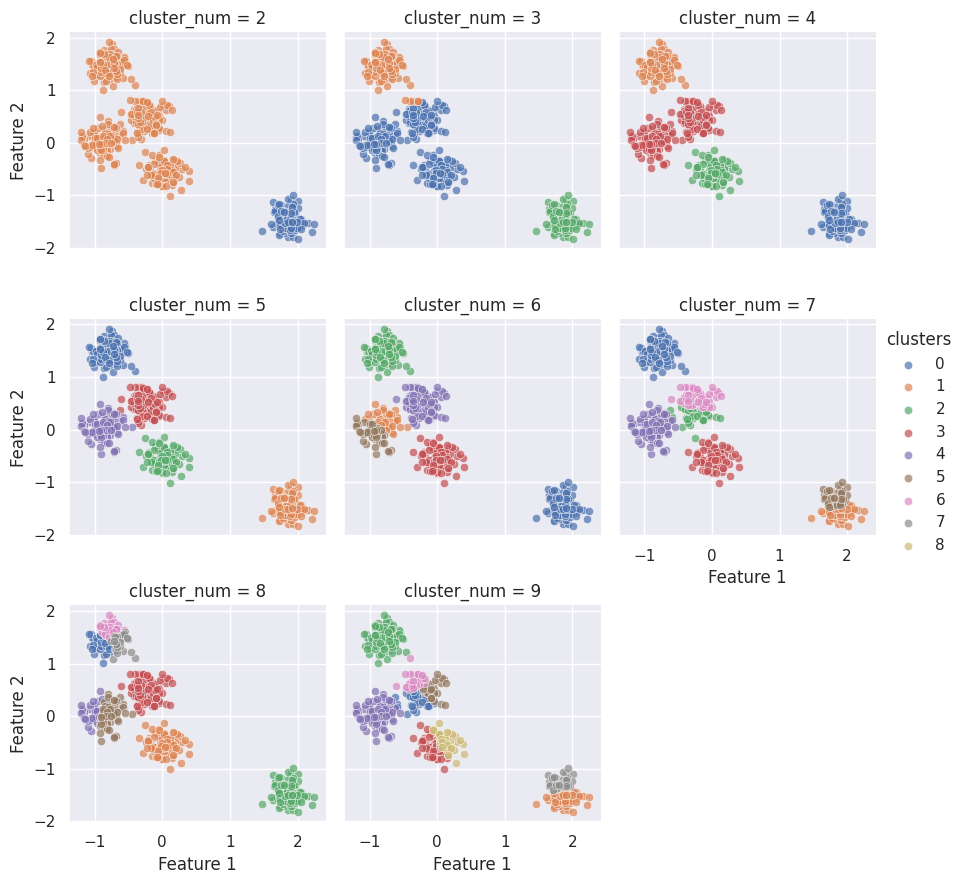

In [48]:
# Various number of clusters
num_clusters = [2,3,4,5,6,7,8,9]
# List to store inertia values
inertia_list = []
# List to store silhouette scores
silhouette_score_list = []

# List used to store clusterings
clustering_result_list = []

# Use StandardScaler to standardize data
standard_scaler = StandardScaler()
artificial_df = standard_scaler.fit_transform(artificial_df)
artificial_df = pd.DataFrame(
    data=artificial_df,
    columns=['Feature 1', 'Feature 2']
)

# Perform clustering for different number of clusters
for num_clust in num_clusters:

    # Perform k means clustering
    kmeans = KMeans(n_clusters=num_clust, n_init='auto')
    kmeans.fit(artificial_df)

    # Calculate and store inertia & silhouette score
    inertia_list.append(kmeans.inertia_)
    silhouette_scr = silhouette_score(artificial_df, kmeans.labels_)
    silhouette_score_list.append(silhouette_scr)

    # Add clustering result to the list
    current_clustering = artificial_df.copy()
    current_clustering['clusters'] = kmeans.labels_
    current_clustering['cluster_num'] = num_clust
    clustering_result_list.append(current_clustering)

# Merge results for all values of num_clust
merged_clustering_result = pd.concat(
    clustering_result_list,
    axis=0,
    ignore_index=True
)

# Plot all clusterings
g = sns.FacetGrid(
    merged_clustering_result,
    col="cluster_num",
    col_wrap=3,
    hue="clusters"
)
g.map(
    sns.scatterplot,
    'Feature 1',
    'Feature 2',
    alpha=.7
)
g.add_legend()

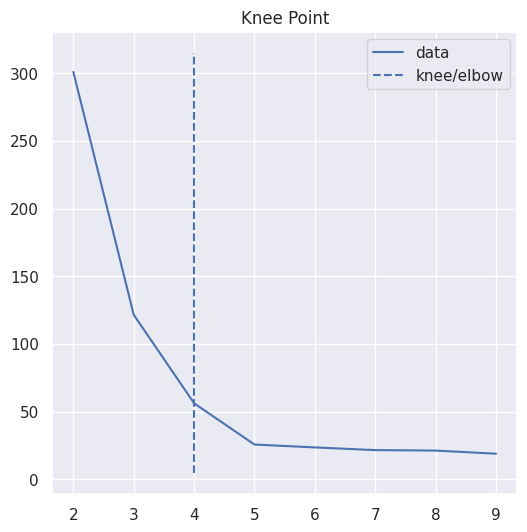

In [49]:
# Plot inertia plot and curve
kneedle = KneeLocator(
    num_clusters,
    inertia_list,
    S=2,
    curve="convex",
    direction="decreasing"
)
kneedle.plot_knee()

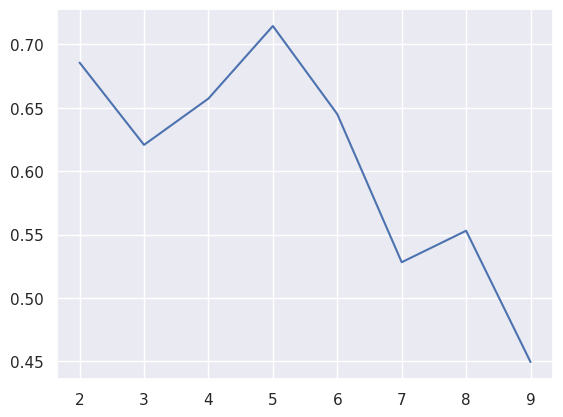

In [50]:
plt.plot(num_clusters, silhouette_score_list)